In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("Zomato data .csv")
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## data cleaning

In [8]:
def handleRate(values):
    values = str(values).split('/')
    values =values[0];
    return float(values)

In [10]:
data['rate'] = data['rate'].apply(handleRate)

In [12]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## TYPE OF RESTURANT

Text(0.5, 0, 'type of resturant')

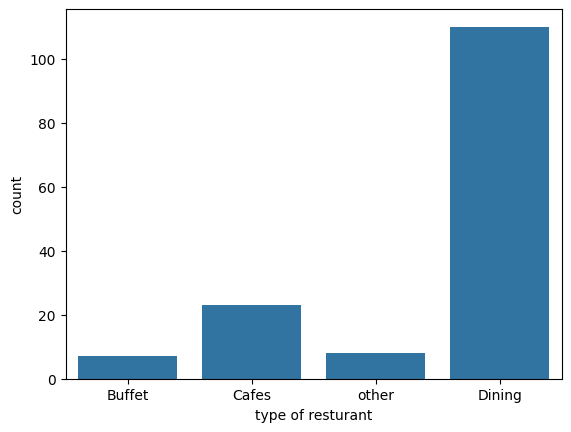

In [19]:
sns.countplot(x = data['listed_in(type)'])
plt.xlabel('type of resturant')

## conclusion -> majority of the resturant falls under the dining

In [22]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


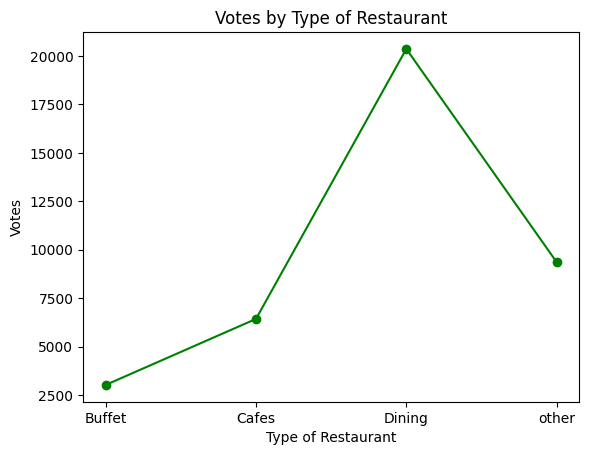

In [40]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()  
result = pd.DataFrame({'votes': grouped_data}).reset_index()  

plt.plot(result['listed_in(type)'], result['votes'], c='green', marker='o')
plt.xlabel('Type of Restaurant', color='black')
plt.ylabel('Votes', color='black')
plt.title('Votes by Type of Restaurant')
plt.show()


## dining resturant resive maximum votes

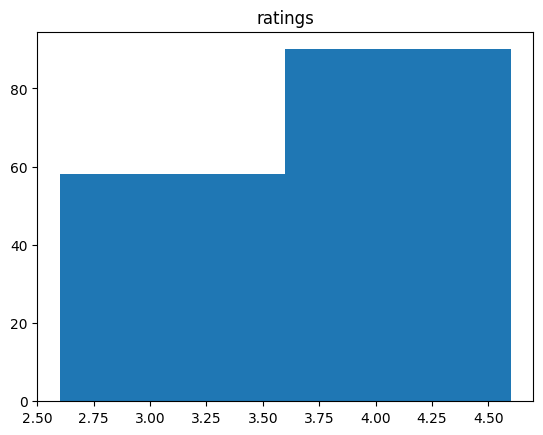

In [45]:
plt.hist(data['rate'] , bins=2)
plt.title('ratings')
plt.show()

## the majority ratting is 3.75 to 4.50

In [47]:
data.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

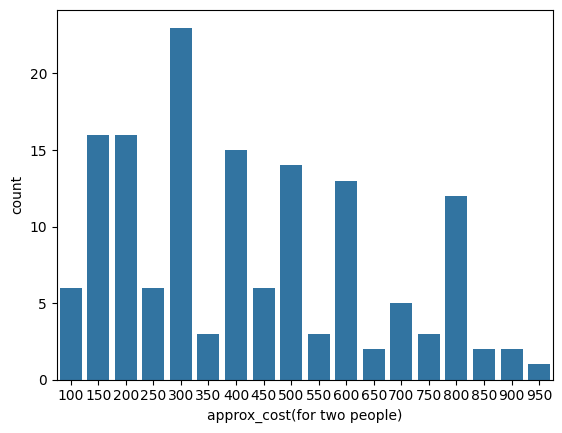

In [55]:
count = data['approx_cost(for two people)']
sns.countplot(x = count)

## maximum order is around 300 rups

<Axes: xlabel='online_order', ylabel='rate'>

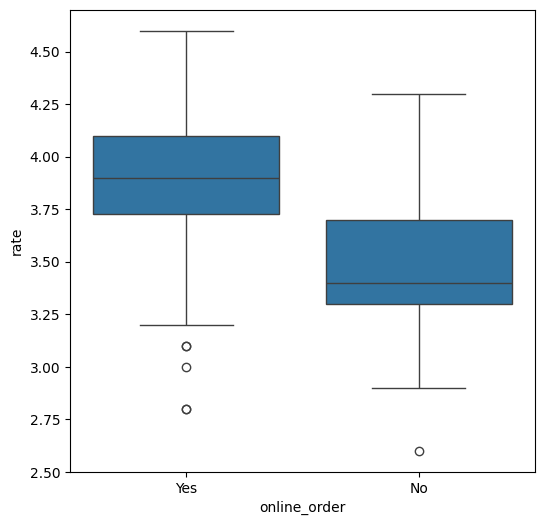

In [61]:
plt.figure(figsize=(6 ,6))
sns.boxplot(x = 'online_order' , y = 'rate' , data = data)

## maximum online ratting as compare to offline

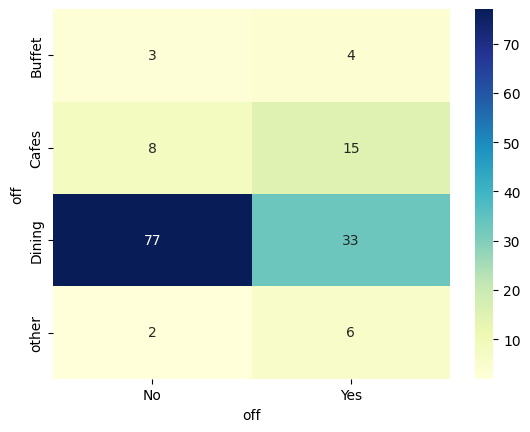

In [69]:
povit_table= data.pivot_table(index='listed_in(type)' , columns='online_order' , aggfunc='size' )
sns.heatmap(povit_table , annot=True , cmap='YlGnBu' , fmt='d')
plt.xlabel('off')
plt.ylabel('off')
plt.show()

In [ ]:
## dinning get maximum ofline or